In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# I. Gathering data from Spain,Italy,France,China,Korea

1. Lethality data by age slice:
Study : https://www.medrxiv.org/content/10.1101/2020.03.04.20031104v1.full.pdf

Italy :Onder G,Rezza G, Brusaferro S. Case-Fatality Rate and Characteristics of Patients Dying in relation to Covid-19                in Italy, JAM.

China:Chinese Center for Control and Prevention

Spain:Spanish Ministry of Health

Korea: Korea Center for Diseases and Prevention

In [22]:
Data_death=pd.DataFrame({"Italy":[0,0,0,0.3,0.4,1,3.5,12.8,20.2],"Korea":[0,0,0,0.11,0.08,0.5,1.8,6.3,13],"China":[0,0.2,0.2,0.2,0.4,1.3,3.6,8,14.8],"Spain":[0,0,0.22,0.14,0.3,0.4,1.9,4.8,15.6],"Study":[0,0.25,0.22,0.26,0.48,1.4,3.8,8.5,15]},index=["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80+"])
Data_death

,Italy,Korea,China,Spain,Study
0-9,0.0,0.00,0.0,0.00,0.00
10-19,0.0,0.00,0.2,0.00,0.25
20-29,0.0,0.00,0.2,0.22,0.22
30-39,0.3,0.11,0.2,0.14,0.26
40-49,0.4,0.08,0.4,0.30,0.48
50-59,1.0,0.50,1.3,0.40,1.40
60-69,3.5,1.80,3.6,1.90,3.80
70-79,12.8,6.30,8.0,4.80,8.50
80+,20.2,13.00,14.8,15.60,15.00


2. Demographic data age structure by country.
No sources retains, around 2018-2019 estimations
Spain : governmental website of Spain

In [23]:
korea=pd.read_csv("demographie/korea_demography.csv")
korea=korea.rename(columns={'Unnamed: 0':"Age","0":"population distribution"})
korea=korea.set_index("Age")
korea.loc[:,"death rate of Study"]=Data_death.loc[:,"Study"]
korea.loc[:,"death rate of Korea"]=Data_death.loc[:,"Korea"]
korea.name="30 march"
korea.loc[:,"death rate with homogeneous spreading, Study"]=korea.loc[:,"death rate of Study"]*korea.loc[:,"population distribution"]/100
korea.loc[:,"death rate with homogeneous spreading, Korea"]=korea.loc[:,"death rate of Korea"]*korea.loc[:,"population distribution"]/100
korea=korea.append(korea.agg(['sum']))
korea.loc['sum',["death rate of Study","death rate of Korea"]]=np.nan
print("Korea")
korea

Korea


,population distribution,death rate of Study,death rate of Korea,"death rate with homogeneous spreading, Study","death rate with homogeneous spreading, Korea"
0-9,8.75,0.00,0.00,0.000000,0.000000
10-19,9.37,0.25,0.00,0.023425,0.000000
20-29,13.22,0.22,0.00,0.029084,0.000000
30-39,13.73,0.26,0.11,0.035698,0.015103
40-49,15.63,0.48,0.08,0.075024,0.012504
50-59,16.27,1.40,0.50,0.227780,0.081350
60-69,12.51,3.80,1.80,0.475380,0.225180
70-79,6.93,8.50,6.30,0.589050,0.436590
80+,3.61,15.00,13.00,0.541500,0.469300
sum,100.02,NaN,NaN,1.996941,1.240027


In [24]:
italy=pd.read_csv("italy.csv")
italy=italy.rename(columns={"Unnamed: 0":"Age"})
italy.set_index("Age",inplace=True)
italy.loc[:,"death rate of Italy"]=Data_death.loc[:,"Italy"]
italy.loc[:,"death rate of Korea"]=Data_death.loc[:,"Korea"]
italy.loc[:,"death rate with homogeneous spreading, Study"]=italy.loc[:,"death rate of study"]*italy.loc[:,"population distribution"]/100
italy.loc[:,"death rate with homogeneous spreading, Italy"]=italy.loc[:,"death rate of Italy"]*italy.loc[:,"population distribution"]/100
italy.loc[:,"death rate with homogeneous spreading, Korea rates"]=italy.loc[:,"death rate of Korea"]*italy.loc[:,"population distribution"]/100
italy=italy.iloc[:-1,:]
italy=italy.append(italy.agg(['sum']))
italy.loc['sum',["death rate of study","death rate of Italy","death rate of Korea"]]=np.nan
print("Italy")
italy

Italy


,population distribution,death rate of study,death rate calculated with homogeneous spread,death rate of Italy,death rate of Korea,"death rate with homogeneous spreading, Study","death rate with homogeneous spreading, Italy","death rate with homogeneous spreading, Korea rates"
0-9,9.014493,0.00,0.000000,0.0,0.00,0.000000,0.000000,0.000000
10-19,9.398421,0.25,0.000000,0.0,0.00,0.023496,0.000000,0.000000
20-29,10.018448,0.22,0.000000,0.0,0.00,0.022041,0.000000,0.000000
30-39,12.253667,0.26,0.241188,0.3,0.11,0.031860,0.036761,0.013479
40-49,15.975523,0.48,0.729110,0.4,0.08,0.076683,0.063902,0.012780
50-59,14.744925,1.40,2.865083,1.0,0.50,0.206429,0.147449,0.073725
60-69,12.354328,3.80,10.708758,3.5,1.80,0.469464,0.432401,0.222378
70-79,9.561771,8.50,43.690702,12.8,6.30,0.812751,1.223907,0.602392
80+,6.678424,15.00,86.164337,20.2,13.00,1.001764,1.349042,0.868195
sum,100.000000,NaN,144.399180,NaN,NaN,2.644486,3.253462,1.792949


In [25]:
spain=pd.read_csv("demographie/spain_clean.csv")
spain=spain.rename(columns={"Unnamed: 0":"Age"})
spain=spain.set_index('Age')
spain=spain[["population distribution"]]
spain

,population distribution
Age,
0-9,9.279873
10-19,10.368167
20-29,10.292771
30-39,13.094560
40-49,16.588340
50-59,14.806688
60-69,11.214075
70-79,8.281355
80+,6.074172


In [26]:
spain.loc[:,"death rate of Spain"]=Data_death.loc[:,"Spain"]
spain.loc[:,"death rate of Study"]=Data_death.loc[:,"Study"]
spain.loc[:,"death rate of Korea"]=Data_death.loc[:,"Korea"]
spain.loc[:,"death rate with homogeneous spreading, Study"]=spain.loc[:,"death rate of Study"]*spain.loc[:,"population distribution"]/100
spain.loc[:,"death rate with homogeneous spreading, Spain"]=spain.loc[:,"death rate of Spain"]*spain.loc[:,"population distribution"]/100
spain.loc[:,"death rate with homogeneous spreading, Korea rates"]=spain.loc[:,"death rate of Korea"]*spain.loc[:,"population distribution"]/100
spain=spain.append(spain.agg(['sum']))
spain.loc['sum',["death rate of Study","death rate of Spain","death rate of Korea"]]=np.nan
print("Spain")
spain

Spain


,population distribution,death rate of Spain,death rate of Study,death rate of Korea,"death rate with homogeneous spreading, Study","death rate with homogeneous spreading, Spain","death rate with homogeneous spreading, Korea rates"
0-9,9.279873,0.00,0.00,0.00,0.000000,0.000000,0.000000
10-19,10.368167,0.00,0.25,0.00,0.025920,0.000000,0.000000
20-29,10.292771,0.22,0.22,0.00,0.022644,0.022644,0.000000
30-39,13.094560,0.14,0.26,0.11,0.034046,0.018332,0.014404
40-49,16.588340,0.30,0.48,0.08,0.079624,0.049765,0.013271
50-59,14.806688,0.40,1.40,0.50,0.207294,0.059227,0.074033
60-69,11.214075,1.90,3.80,1.80,0.426135,0.213067,0.201853
70-79,8.281355,4.80,8.50,6.30,0.703915,0.397505,0.521725
80+,6.074172,15.60,15.00,13.00,0.911126,0.947571,0.789642
sum,100.000000,NaN,NaN,NaN,2.410704,1.708111,1.614929


In [27]:
france=pd.read_csv("demographie/france.csv")
france=france.rename(columns={"Unnamed: 0":"Age",'population':'population distribution'})
france=france.set_index('Age')
france=france[["population distribution"]]
france.loc[:,"death rate of Study"]=Data_death.loc[:,"Study"]
france.loc[:,"death rate of Korea"]=Data_death.loc[:,"Korea"]
france.loc[:,"death rate with homogeneous spreading, Study"]=france.loc[:,"death rate of Study"]*france.loc[:,"population distribution"]/100
france.loc[:,"death rate with homogeneous spreading, Korea rates"]=france.loc[:,"death rate of Korea"]*france.loc[:,"population distribution"]/100
france=france.append(france.agg(['sum']))
france.loc['sum',["death rate of Study","death rate of Korea"]]=np.nan
print("France")
france

France


,population distribution,death rate of Study,death rate of Korea,"death rate with homogeneous spreading, Study","death rate with homogeneous spreading, Korea rates"
0-9,11.872664,0.00,0.00,0.000000,0.000000
10-19,12.943020,0.25,0.00,0.032358,0.000000
20-29,11.444573,0.22,0.00,0.025178,0.000000
30-39,12.321308,0.26,0.11,0.032035,0.013553
40-49,12.955556,0.48,0.08,0.062187,0.010364
50-59,13.230221,1.40,0.50,0.185223,0.066151
60-69,11.719470,3.80,1.80,0.445340,0.210950
70-79,8.357890,8.50,6.30,0.710421,0.526547
80+,5.155298,15.00,13.00,0.773295,0.670189
sum,100.000000,NaN,NaN,2.266036,1.497755


In [28]:
china=pd.read_csv("demographie/china.csv")
china=china.rename(columns={"Unnamed: 0":"Age",'total':'population distribution'})
china=china.set_index('Age')
china.loc[:,"death rate of Study"]=Data_death.loc[:,"Study"]
china.loc[:,"death rate of Korea"]=Data_death.loc[:,"Korea"]
china.loc[:,"death rate with homogeneous spreading, Study"]=china.loc[:,"death rate of Study"]*china.loc[:,"population distribution"]/100
china.loc[:,"death rate with homogeneous spreading, Korea rates"]=china.loc[:,"death rate of Korea"]*china.loc[:,"population distribution"]/100
china=china.append(china.agg(['sum']))
china.loc['sum',["death rate of Study","death rate of Korea"]]=np.nan
print("China")
china

China


,Male,Female,population distribution,death rate of Study,death rate of Korea,"death rate with homogeneous spreading, Study","death rate with homogeneous spreading, Korea rates"
0-9,6.3,5.6,11.9,0.00,0.00,0.00000,0.00000
10-19,6.2,5.4,11.6,0.25,0.00,0.02900,0.00000
20-29,7.1,6.4,13.5,0.22,0.00,0.02970,0.00000
30-39,8.0,7.6,15.6,0.26,0.11,0.04056,0.01716
40-49,8.0,7.6,15.6,0.48,0.08,0.07488,0.01248
50-59,7.6,7.4,15.0,1.40,0.50,0.21000,0.07500
60-69,5.2,5.2,10.4,3.80,1.80,0.39520,0.18720
70-79,2.2,2.5,4.7,8.50,6.30,0.39950,0.29610
80+,0.8,1.0,1.8,15.00,13.00,0.27000,0.23400
sum,51.4,48.7,100.1,NaN,NaN,1.44884,0.82194





Global death rate expected for every country according to death rate and age structure
Based onto the Study rate. Since no cure are available yet, as long as hospital aren't satured, the main difference of lethality will be age of patients. In order to comprehend the role of age structure, we need to set a lethality reference. So I took the study for that purpose. Not that there is more chance the data are correct, since it's one of the oldest study onto the topic.






In [29]:
death_rate=pd.DataFrame([italy.iloc[-1,-2],spain.iloc[-1,-2],korea.iloc[-1,-2],france.iloc[-1,-1],china.iloc[-1,-1]],index=["Spain",'Italy','Korea','France',"China"])
death_rate

,0
Spain,3.253462
Italy,1.708111
Korea,1.996941
France,1.497755
China,0.821940


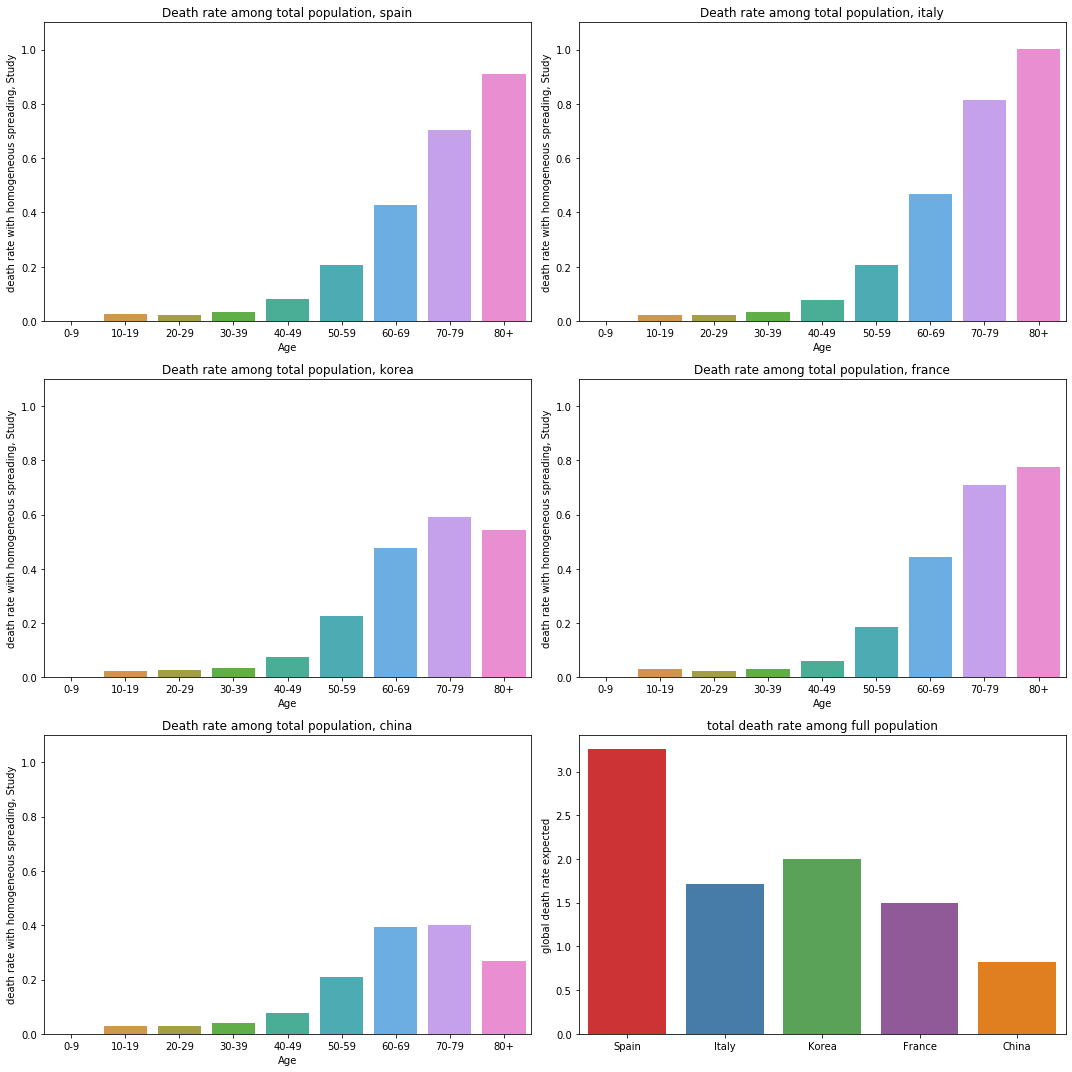

In [30]:
fig,axes=plt.subplots(3,2,figsize=(15,15))
a=sns.barplot(x=spain.index[:-1],y="death rate with homogeneous spreading, Study",data=spain.iloc[:-1,:],ax=axes[0,0])
a.set(title="Death rate among total population, spain",ylim=(0,1.1),xlabel="Age")
b=sns.barplot(x=italy.index[:-1],y="death rate with homogeneous spreading, Study",data=italy.iloc[:-1,:],ax=axes[0,1])
b.set(title="Death rate among total population, italy",ylim=(0,1.1),xlabel="Age")
c=sns.barplot(x=korea.index[:-1],y="death rate with homogeneous spreading, Study",data=korea.iloc[:-1,:],ax=axes[1,0])
c.set(title="Death rate among total population, korea",ylim=(0,1.1),xlabel="Age")
d=sns.barplot(x=france.index[:-1],y="death rate with homogeneous spreading, Study",data=france.iloc[:-1,:],ax=axes[1,1])
d.set(title="Death rate among total population, france",ylim=(0,1.1),xlabel="Age")
e=sns.barplot(x=china.index[:-1],y="death rate with homogeneous spreading, Study",data=china.iloc[:-1,:],ax=axes[2,0])
e.set(title="Death rate among total population, china",ylim=(0,1.1),xlabel="Age")
f=sns.barplot(x=death_rate.index,y=0,data=death_rate,ax=axes[2,1])
f.set(title="total death rate among full population",ylabel="global death rate expected")
plt.tight_layout()


I find it less usefull but in order to show that i'm working :

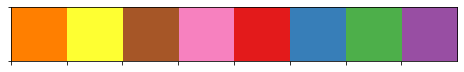

In [31]:
color=sns.color_palette()

sns.set_palette("Set1",8,1)
a=color[0:4]
color=color[4:]
color=color+a
color
sns.palplot(color)

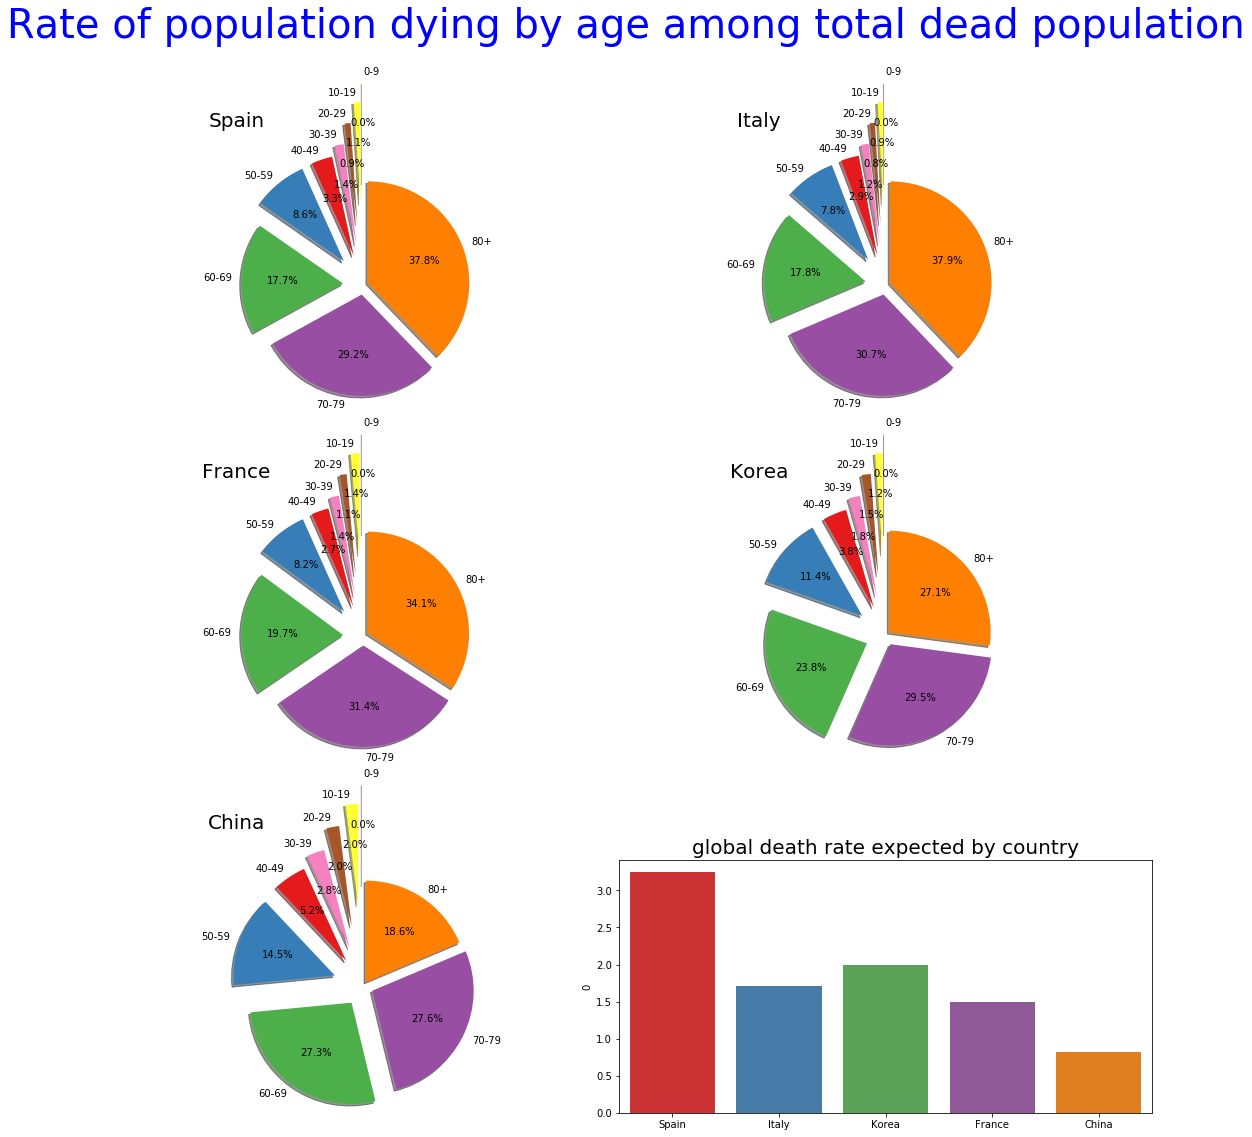

In [32]:
fig,axes=plt.subplots(3,2,figsize=(15,15))
plt.suptitle('Rate of population dying by age among total dead population',fontsize=40,color='B',y=1.05)

labels=china.index[:-1]
size=spain["death rate with homogeneous spreading, Study"][:-1]
a=axes[0,0].pie(size,labels=labels,shadow=True,autopct='%1.1f%%',startangle=90,explode=(1,0.8,0.6,0.4,0.3,0.3,0.2,0.1,0.05),colors=color)
axes[0,0].set_title("Spain",fontsize=20,x=0,y=1.1)

size=italy["death rate with homogeneous spreading, Study"][:-1]
axes[0,1].pie(size,labels=labels,shadow=True,autopct='%1.1f%%',startangle=90,explode=(1,0.8,0.6,0.4,0.3,0.3,0.2,0.1,0.05),colors=color)
axes[0,1].set_title("Italy",fontsize=20,x=0,y=1.1)

size=france["death rate with homogeneous spreading, Study"][:-1]
axes[1,0].pie(size,labels=labels,shadow=True,autopct='%1.1f%%',startangle=90,explode=(1,0.8,0.6,0.4,0.3,0.3,0.2,0.1,0.05),colors=color)
axes[1,0].set_title("France",fontsize=20,x=0,y=1.1)

size=korea["death rate with homogeneous spreading, Study"][:-1]
axes[1,1].pie(size,labels=labels,shadow=True,autopct='%1.1f%%',startangle=90,explode=(1,0.8,0.6,0.4,0.3,0.3,0.2,0.1,0.05),colors=color)
axes[1,1].set_title("Korea",fontsize=20,x=0,y=1.1)

size=china["death rate with homogeneous spreading, Study"][:-1]
axes[2,0].pie(size,labels=labels,shadow=True,autopct='%1.1f%%',startangle=90,explode=(1,0.8,0.6,0.4,0.3,0.3,0.2,0.1,0.05),colors=color)
axes[2,0].set_title("China",fontsize=20,x=0,y=1.1)

f=sns.barplot(x=death_rate.index,y=0,data=death_rate,ax=axes[2,1])
f.set_title("global death rate expected by country",fontsize=20)
plt.tight_layout()

We can see that the structure of population play a main role into the gravity expected of the virus.

# II. Trying to extrapolate number of person infected by the lethality rate and number of dead

Here we are trying to know how many people where infected 3 weeks before the end of the current data set(1st april)
Methodology:

    Being unable to find the age of the dead, i did the assumption that virus had an homogeneous spread among popultaiont:
    
    By that I mean that I expect that for 100 Persons contaminated being representative of the age structure of the Overall  population of the country.
    I used the death rate previously calculated to calculate total estimated cases.
    Since the dead are people contaminated around 3 weeks ago, I needed to pull data back in order to compare with Tested 
    cases

In [66]:
data=pd.read_csv("full_data.csv")
data["date"]=pd.to_datetime(data["date"])
F=data.groupby("location").get_group("France").where(data["date"]>pd.Timestamp(2020,2,1)).dropna(axis=0)
C=data.groupby("location").get_group("China").where(data["date"]>pd.Timestamp(2020,2,1)).dropna()
I=data.groupby("location").get_group("Italy").where(data["date"]>pd.Timestamp(2020,2,1)).dropna()
K=data.groupby("location").get_group("South Korea").where(data["date"]>pd.Timestamp(2020,2,1)).dropna()
S=data.groupby("location").get_group("Spain").where(data["date"]>pd.Timestamp(2020,2,1)).dropna()

In [67]:
f_rate_min=100/france["death rate with homogeneous spreading, Korea rates"][-1]
f_rate_max=100/france["death rate with homogeneous spreading, Study"][-1]
c_rate_min=100/china["death rate with homogeneous spreading, Korea rates"][-1]
c_rate_max=100/china["death rate with homogeneous spreading, Study"][-1]
i_rate_min=100/italy["death rate with homogeneous spreading, Korea rates"][-1]
i_rate_max=100/italy["death rate with homogeneous spreading, Study"][-1]
k_rate_min=100/korea["death rate with homogeneous spreading, Korea"][-1]
k_rate_max=100/korea["death rate with homogeneous spreading, Study"][-1]
s_rate_min=100/spain["death rate with homogeneous spreading, Korea rates"][-1]
s_rate_max=100/spain["death rate with homogeneous spreading, Study"][-1]

In [68]:
F

,date,location,new_cases,new_deaths,total_cases,total_deaths
2597,2020-02-02,France,0.0,0.0,6.0,0.0
2598,2020-02-03,France,0.0,0.0,6.0,0.0
2599,2020-02-04,France,0.0,0.0,6.0,0.0
2600,2020-02-05,France,0.0,0.0,6.0,0.0
2601,2020-02-06,France,0.0,0.0,6.0,0.0
2602,2020-02-07,France,0.0,0.0,6.0,0.0
2603,2020-02-08,France,5.0,0.0,11.0,0.0
2604,2020-02-09,France,0.0,0.0,11.0,0.0
2605,2020-02-10,France,0.0,0.0,11.0,0.0
2606,2020-02-11,France,0.0,0.0,11.0,0.0


In [69]:
incubation_time_avg=5
first_symptom_tim_avg=5
delay_to_die=10 ## cas grave : delai de réa 20 jours si guérrison. Estimation à la louche
delay=incubation_time_avg+first_symptom_tim_avg+delay_to_die
F.loc[:,"calculated total case min"]=F["total_deaths"].shift(-delay)*f_rate_max
I.loc[:,"calculated total case min"]=I["total_deaths"].shift(-delay)*i_rate_max
C.loc[:,"calculated total case min"]=C["total_deaths"].shift(-delay)*c_rate_max
S.loc[:,"calculated total case min"]=S["total_deaths"].shift(-delay)*s_rate_max
K.loc[:,"calculated total case min"]=K["total_deaths"].shift(-delay)*k_rate_max

F.loc[:,"calculated total case max"]=F["total_deaths"].shift(-delay)*f_rate_min
I.loc[:,"calculated total case max"]=I["total_deaths"].shift(-delay)*i_rate_min
C.loc[:,"calculated total case max"]=C["total_deaths"].shift(-delay)*c_rate_min
S.loc[:,"calculated total case max"]=S["total_deaths"].shift(-delay)*s_rate_min
K.loc[:,"calculated total case max"]=K["total_deaths"].shift(-delay)*k_rate_min

In [70]:
F.set_index("date",inplace=True)
F=F.iloc[:,1:]
F=F.dropna()

I.set_index("date",inplace=True)
I=I.iloc[:,1:]
I=I.dropna()

C.set_index("date",inplace=True)
C=C.iloc[:,1:]
C=C.dropna()

S.set_index("date",inplace=True)
S=S.iloc[:,1:]
S=S.dropna()

K.set_index("date",inplace=True)
K=K.iloc[:,1:]
K=K.dropna()

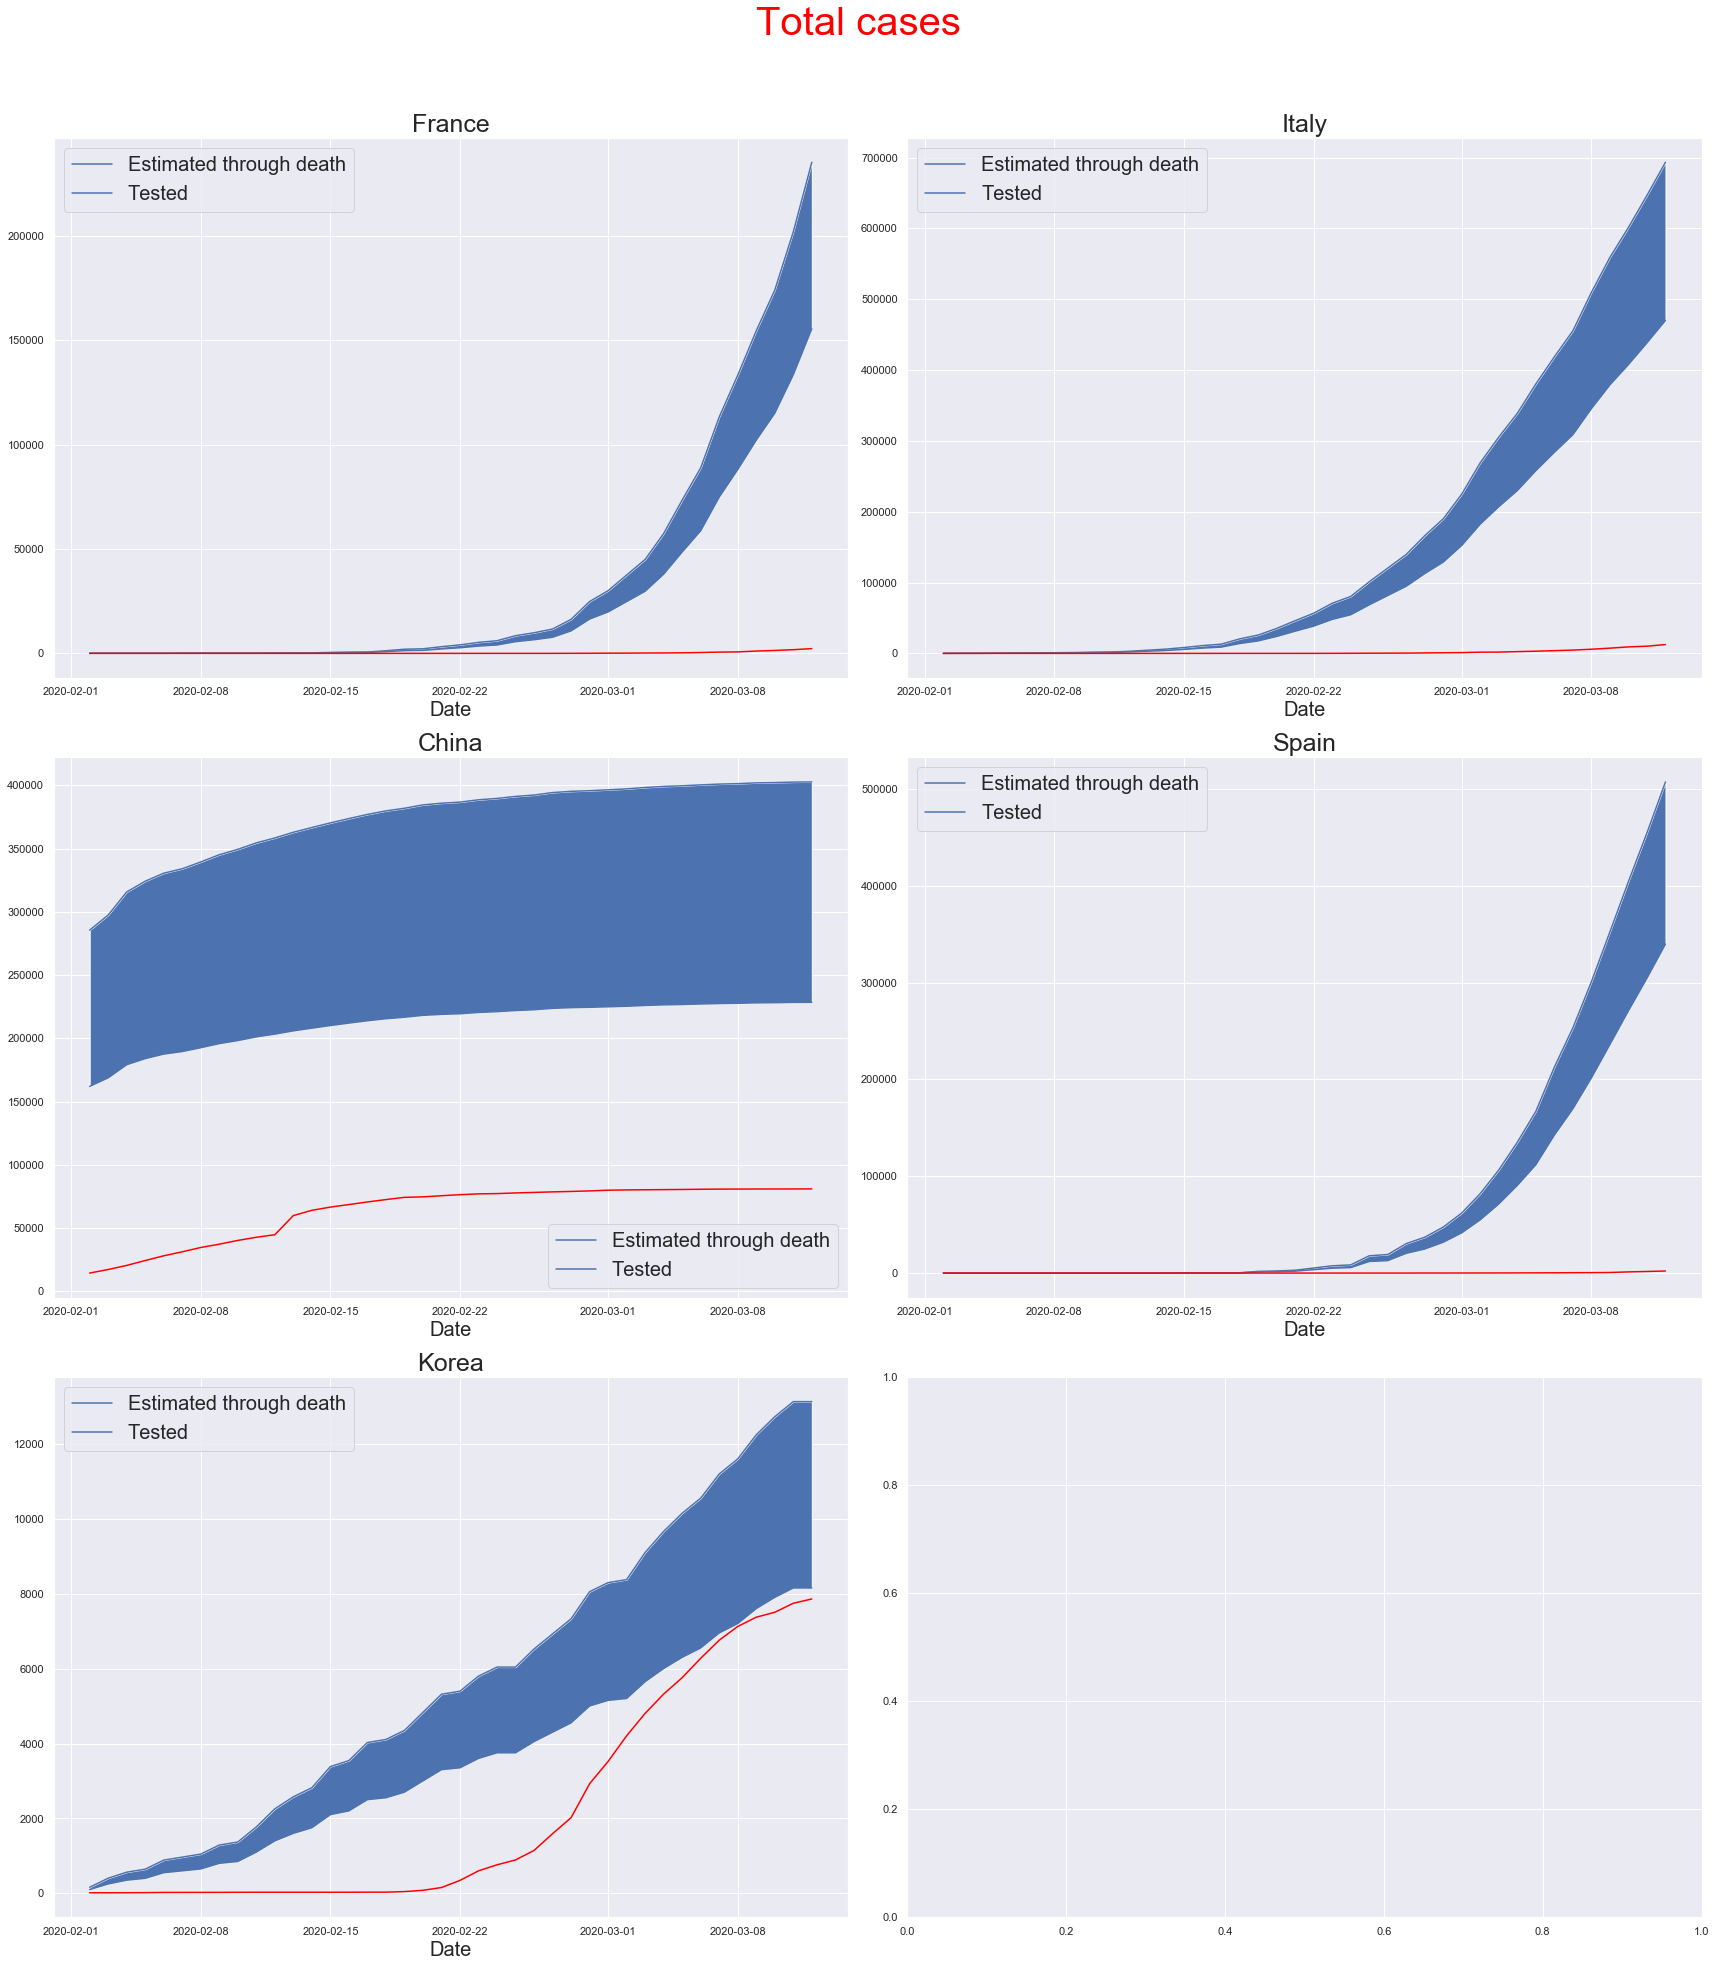

In [82]:
fig,ax=plt.subplots(3,2,figsize=(24,26))
plt.suptitle('Total cases',fontsize=40,color='red',y=1.05)

sns.lineplot(x=F.index,y="calculated total case max",data=F,ax=ax[0,0],color="b")
sns.lineplot(F.index,F["calculated total case min"],ax=ax[0,0],color="b")
a=sns.lineplot(x=F.index,y="total_cases",data=F,ax=ax[0,0],color='red')
a.set_title("France",fontsize=25)
ax[0,0].legend(["Estimated through death","Tested"],prop={'size':20})
a.fill_between(F.index,F["calculated total case min"],F["calculated total case max"])

sns.lineplot(x=I.index,y="calculated total case max",data=I,ax=ax[0,1],color="b")
sns.lineplot(x=I.index,y="calculated total case min",data=I,ax=ax[0,1],color="b")
b=sns.lineplot(x=I.index,y="total_cases",data=I,ax=ax[0,1],color='red')
b.set_title("Italy",fontsize=25)
ax[0,1].legend(["Estimated through death","Tested"],prop={'size':20})
b.fill_between(I.index,I["calculated total case min"],I["calculated total case max"])


sns.lineplot(x=C.index,y="calculated total case max",data=C,ax=ax[1,0],color="b")
sns.lineplot(x=C.index,y="calculated total case min",data=C,ax=ax[1,0],color="b")
c=sns.lineplot(x=C.index,y="total_cases",data=C,ax=ax[1,0],color='red')
c.set_title("China",fontsize=25)
ax[1,0].legend(["Estimated through death","Tested"],prop={'size':20})
c.fill_between(C.index,C["calculated total case min"],C["calculated total case max"])


sns.lineplot(x=S.index,y="calculated total case max",data=S,ax=ax[1,1],color="b")
sns.lineplot(x=S.index,y="calculated total case min",data=S,ax=ax[1,1],color="b")
d=sns.lineplot(x=S.index,y="total_cases",data=S,ax=ax[1,1],color='red')
d.set_title("Spain",fontsize=25)
d.fill_between(S.index,S["calculated total case min"],S["calculated total case max"])
ax[1,1].legend(["Estimated through death","Tested"],prop={'size':20})

sns.lineplot(x=K.index,y="calculated total case max",data=K,ax=ax[2,0],color="b")
sns.lineplot(x=K.index,y="calculated total case min",data=K,ax=ax[2,0],color="b")
e=sns.lineplot(x=K.index,y="total_cases",data=K,ax=ax[2,0],color='red')
e.set_title("Korea",fontsize=25)
ax[2,0].legend(["Estimated through death","Tested"],prop={'size':20})
e.fill_between(K.index,K["calculated total case min"],K["calculated total case max"])


for i in [a,b,c,d,e]:
    i.set_xlabel("Date",fontsize=20)
    i.set_ylabel(None)
plt.tight_layout()

If we make the hypothesis that china didn't lie on their cases or lied in percentage, giving a good understanding of the propagation, the 20 day delay estimated seems fair.

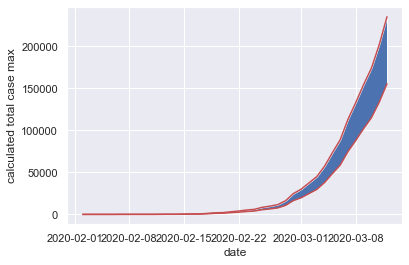

# III. Trying to find the number of actual cases of coronavirus infection through extrapolation 

Let's try some linear interpolation onto the number of death.
If we are dealing with exponential growing, we will have:
death=exp(constant.day)
In order to find constant we can interpolate
log(death)=constant*day
then we can put an exponential onto our result

We use the same methodology with a Linear Regression onto the data

In [23]:
import sklearn as sk

from sklearn import model_selection,linear_model
import numpy as np

In [24]:
F2=data.groupby("location").get_group("France").where(data["date"]>pd.Timestamp(2020,2,1)).where(data["total_deaths"]>0).dropna(axis=0)
I2=data.groupby("location").get_group("Italy").where(data["date"]>pd.Timestamp(2020,2,1)).where(data["total_deaths"]>0).dropna(axis=0)
S2=data.groupby("location").get_group("Spain").where(data["date"]>pd.Timestamp(2020,2,1)).where(data["total_deaths"]>0).dropna(axis=0)
C2=data.groupby("location").get_group("China").where(data["date"]>pd.Timestamp(2020,2,1)).where(data["total_deaths"]>0).dropna(axis=0)
K2=data.groupby("location").get_group("South Korea").where(data["date"]>pd.Timestamp(2020,2,1)).where(data["total_deaths"]>0).dropna(axis=0)

In [25]:
F2.loc[:,"day"]=F2.date.dt.dayofyear-46
F2.loc[:,"log of death"]=np.log(F2["total_deaths"])

I2.loc[:,"day"]=I2.date.dt.dayofyear-54
I2.loc[:,"log of death"]=np.log(I2["total_deaths"])

S2.loc[:,"day"]=S2.date.dt.dayofyear-65
S2.loc[:,"log of death"]=np.log(S2["total_deaths"])

C2.loc[:,"day"]=C2.date.dt.dayofyear-33
C2.loc[:,"log of death"]=np.log(C2["total_deaths"])

K2.loc[:,"day"]=K2.date.dt.dayofyear-52
K2.loc[:,"log of death"]=np.log(K2["total_deaths"])



In [26]:
#testing bar for setting day to 0

In [27]:
trainF,testF=model_selection.train_test_split(F2,test_size=0.1)
trainI,testI=model_selection.train_test_split(I2,test_size=0.1)
trainS,testS=model_selection.train_test_split(S2,test_size=0.1)
trainC,testC=model_selection.train_test_split(C2,test_size=0.1)
trainK,testK=model_selection.train_test_split(K2,test_size=0.1)

In [28]:
LF=linear_model.LinearRegression().fit(trainF[["day"]],trainF["log of death"])
LI=linear_model.LinearRegression().fit(trainI[["day"]],trainI["log of death"])
LC=linear_model.LinearRegression().fit(trainC[["day"]],trainC["log of death"])
LS=linear_model.LinearRegression().fit(trainS[["day"]],trainS["log of death"])
LK=linear_model.LinearRegression().fit(trainK[["day"]],trainK["log of death"])

In [29]:
WF=LF.predict(testF[["day"]])
WI=LI.predict(testI[["day"]])
WS=LS.predict(testS[["day"]])
WC=LC.predict(testC[["day"]])
WK=LK.predict(testK[["day"]])

NameError: name 'testF' is not defined

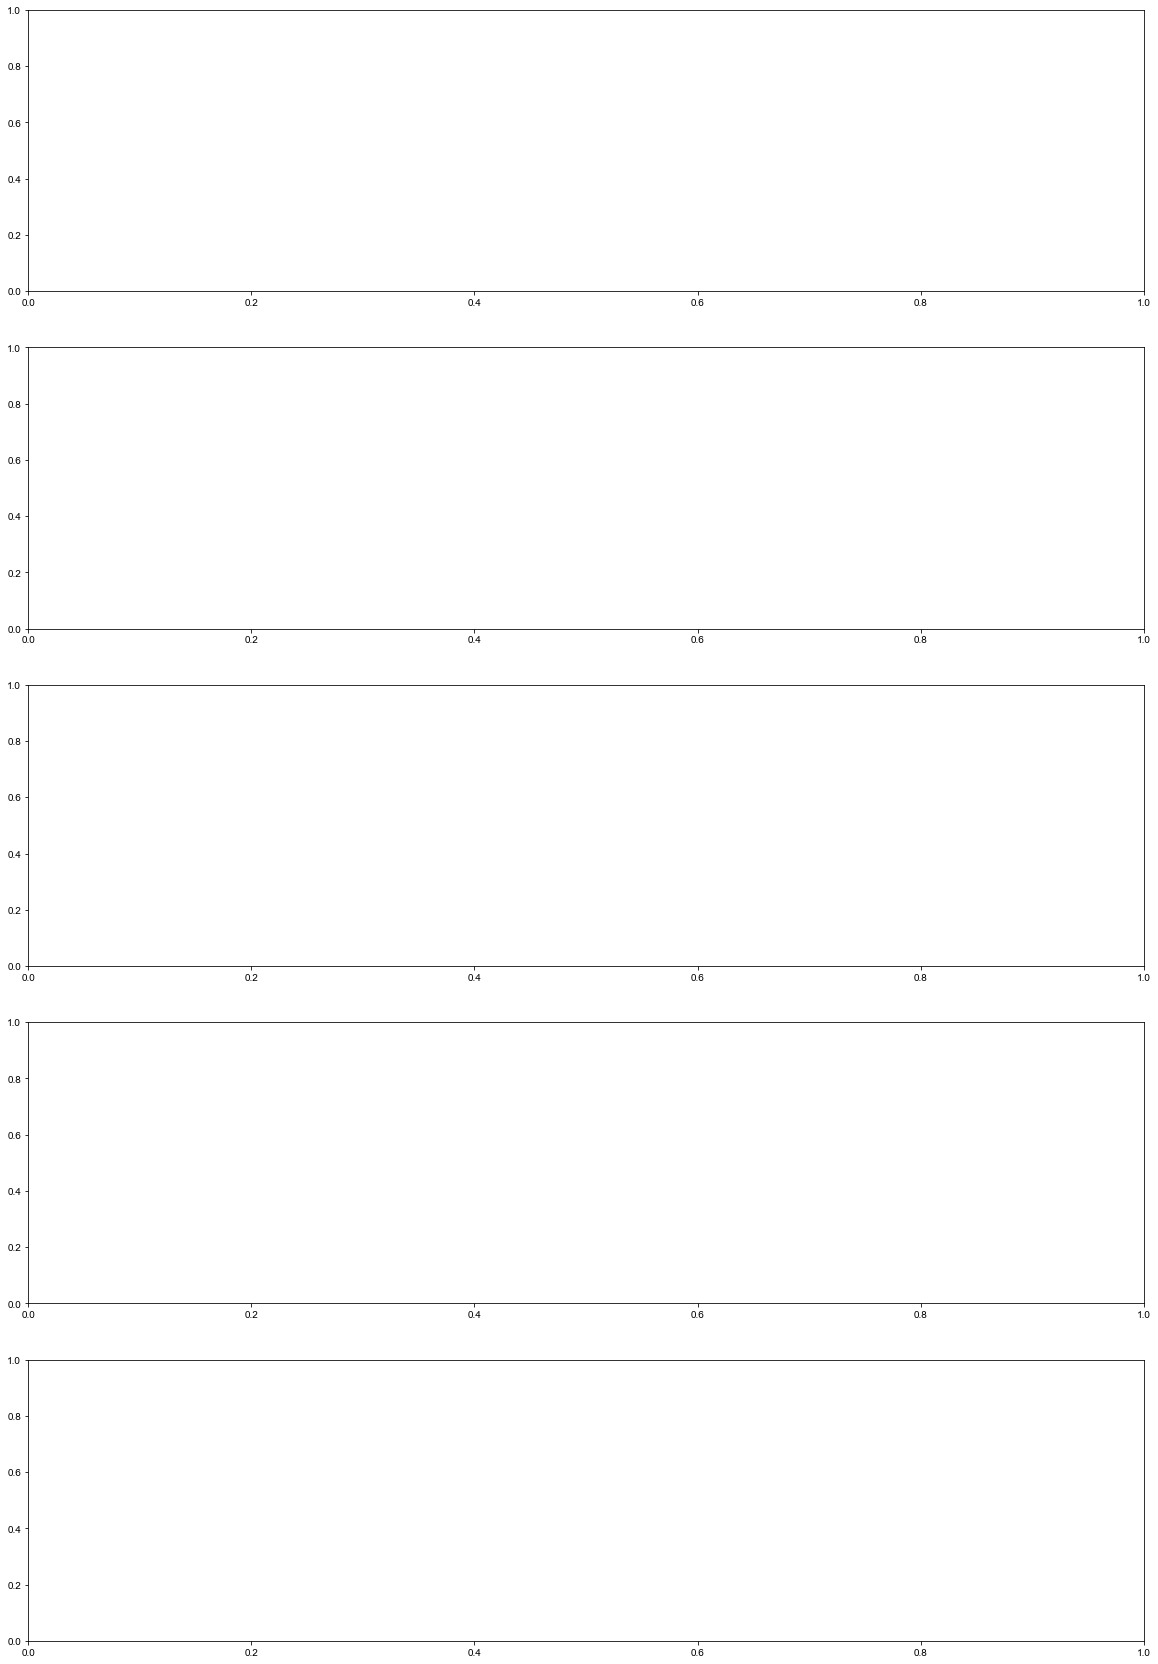

In [39]:
fig,ax=plt.subplots(5,1,figsize=(20,30))
sns.set()
sns.scatterplot(x=testF.day,y=np.exp(WF),ax=ax[0],label='interpolation')
sns.scatterplot(x=testF.day,y=testF["total_deaths"],ax=ax[0],label='True curve')

sns.scatterplot(x=testI.day,y=np.exp(WI),ax=ax[1],label='interpolation')
sns.scatterplot(x=testI.day,y=testI["total_deaths"],ax=ax[1],label='True curve')

sns.scatterplot(x=testS.day,y=np.exp(WS),ax=ax[2],label='interpolation')
sns.scatterplot(x=testS.day,y=testS["total_deaths"],ax=ax[2],label='True curve')

sns.scatterplot(x=testC.day,y=np.exp(WC),ax=ax[3],label='interpolation')
sns.scatterplot(x=testC.day,y=testC["total_deaths"],ax=ax[3],label='True curve')

sns.scatterplot(x=testK.day,y=np.exp(WK),ax=ax[4],label='interpolation')
sns.scatterplot(x=testK.day,y=testK["total_deaths"],ax=ax[4],label='True curve')

For France, the shape of the curve is so beautifull that we can take a train test of 1 elements and it will work.
Italy and Spain aren't that pretty.
China and Korea however doesn't follow the exponential growing : China was on the end of the pandemic, and Korea Policies probably affected a lot the spreading of the virus.


Now that we now that the model indeed is exponential, we have to interpolate onto all our data, to improve accuracy, an exponential phenomenon will have a big error, increasing along x axe:(exp((n+epsylon)*x)=exp(n*x)*exp(x)^epsylon

In [179]:
LF=linear_model.LinearRegression().fit(F2[["day"]],F2["log of death"])
LI=linear_model.LinearRegression().fit(I2[["day"]],I2["log of death"])
LC=linear_model.LinearRegression().fit(C2[["day"]],C2["log of death"])
LS=linear_model.LinearRegression().fit(S2[["day"]],S2["log of death"])
LK=linear_model.LinearRegression().fit(K2[["day"]],K2["log of death"])

WF=LF.predict(F2[["day"]])
WI=LI.predict(I2[["day"]])
WS=LS.predict(S2[["day"]])
WC=LC.predict(C2[["day"]])
WK=LK.predict(K2[["day"]])

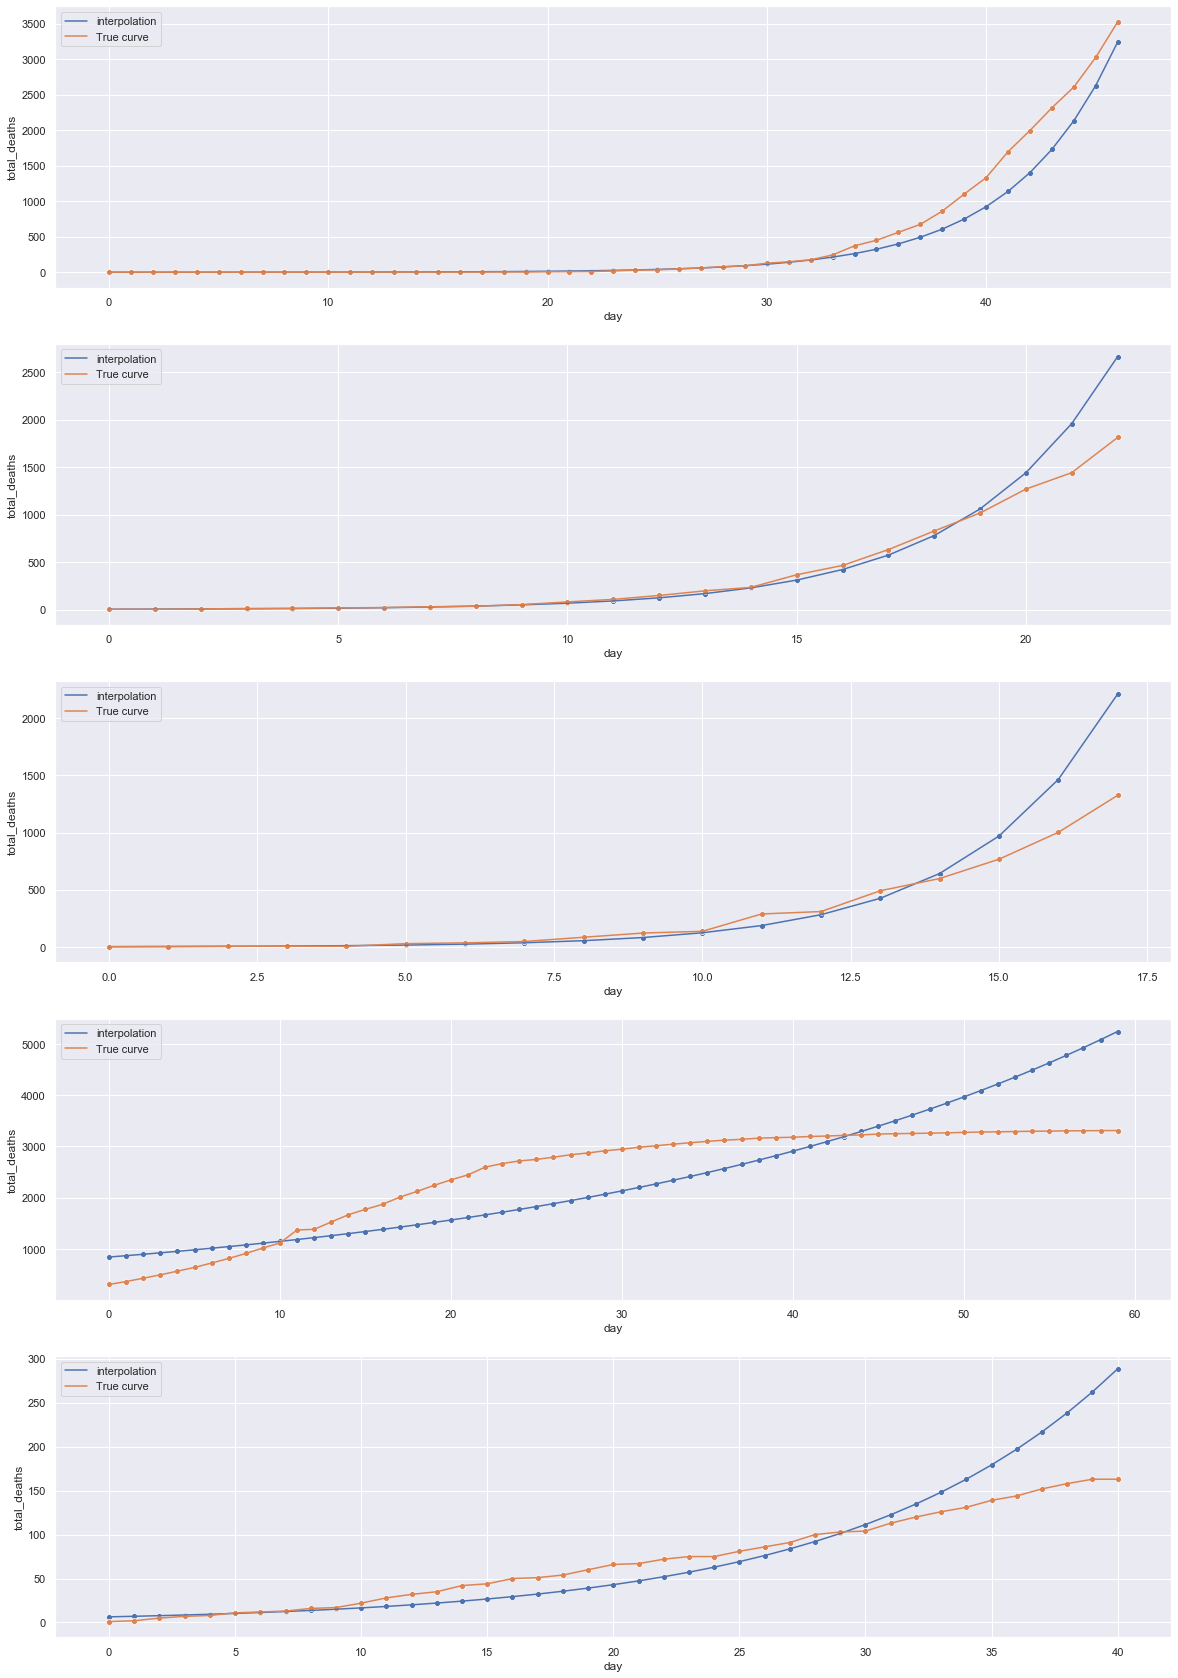

In [183]:

fig,ax=plt.subplots(5,1,figsize=(20,30))
sns.set()
sns.scatterplot(x=F2.day,y=np.exp(WF),ax=ax[0])
sns.scatterplot(x=F2.day,y=F2["total_deaths"],ax=ax[0])
sns.lineplot(x=F2.day,y=np.exp(WF),ax=ax[0],label='interpolation')
sns.lineplot(x=F2.day,y=F2["total_deaths"],ax=ax[0],label='True curve')

sns.scatterplot(x=I2.day,y=np.exp(WI),ax=ax[1])
sns.scatterplot(x=I2.day,y=I2["total_deaths"],ax=ax[1])
sns.lineplot(x=I2.day,y=np.exp(WI),ax=ax[1],label='interpolation')
sns.lineplot(x=I2.day,y=I2["total_deaths"],ax=ax[1],label='True curve')

sns.scatterplot(x=S2.day,y=np.exp(WS),ax=ax[2])
sns.scatterplot(x=S2.day,y=S2["total_deaths"],ax=ax[2])
sns.lineplot(x=S2.day,y=np.exp(WS),ax=ax[2],label='interpolation')
sns.lineplot(x=S2.day,y=S2["total_deaths"],ax=ax[2],label='True curve')

sns.scatterplot(x=C2.day,y=np.exp(WC),ax=ax[3])
sns.scatterplot(x=C2.day,y=C2["total_deaths"],ax=ax[3])
sns.lineplot(x=C2.day,y=np.exp(WC),ax=ax[3],label='interpolation')
sns.lineplot(x=C2.day,y=C2["total_deaths"],ax=ax[3],label='True curve')

sns.scatterplot(x=K2.day,y=np.exp(WK),ax=ax[4])
sns.scatterplot(x=K2.day,y=K2["total_deaths"],ax=ax[4])
sns.lineplot(x=K2.day,y=np.exp(WK),ax=ax[4],label='interpolation')
sns.lineplot(x=K2.day,y=K2["total_deaths"],ax=ax[4],label='True curve')

For france :
Our last day is day 46, in order to extrapolate untill peak(confinment), we need to predict from day 0 to 53 (peak is about 20 days after confinment which happened at day 31)

In [33]:
Days=pd.DataFrame([i for i in range(54)])

In [34]:
Prediction=pd.DataFrame(np.exp(LF.predict(Days)))
Prediction=Prediction.rename(columns={0:"deaths"})
Prediction.index.rename('days')
Prediction

,deaths
0,0.213354
1,0.263025
2,0.324261
3,0.399753
4,0.492820
5,0.607554
6,0.749000
7,0.923377
8,1.138350
9,1.403372


Today we now that prediction were incorrect, unfortunatly (on an analyst standpoint), it were wrong the 2nd day after estimation, 
it will be hard to only relate it to confinment. It's supposedly too soon to see the effect.

The old person dying in special structures weren't take into account in that calculation. 
It shouldn't have play a main factor since their mortality rate has to be pretty high due to comorbidity, and pretty low in term of flat number(among total real cases)
I excpect one of the reason of the failure to be the implicit assumption that during the period evaluated in the dataset, 
Someone Sick the first day was contagious untill the end, Which might have exagerated the result.
Plus in order to be more precise, it would have been greater to take the sum of each exponential model by department, since some department start with 1 person. I intuitively expect a difference.

By using the assuption of homogeneous spread and death estimated on the 53 th day, we should have 14000*100/global_death_rate
aproximatively 800 000 cases before confinment.

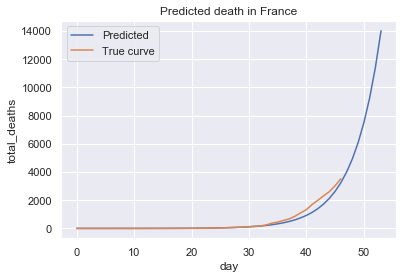

In [35]:
a=sns.lineplot(data=Prediction,label="Predicted",legend=False)
a.set(xlabel='Days',ylabel='Death',title='Predicted death in France')
sns.lineplot(x=F2["day"],y=F2["total_deaths"],label='True curve')

In [36]:
I2

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,log of death
3946,2020-02-23,Italy,62.0,2.0,79.0,2.0,0,0.693147
3947,2020-02-24,Italy,53.0,0.0,132.0,2.0,1,0.693147
3948,2020-02-25,Italy,97.0,4.0,229.0,6.0,2,1.791759
3949,2020-02-26,Italy,93.0,5.0,322.0,11.0,3,2.397895
3950,2020-02-27,Italy,78.0,1.0,400.0,12.0,4,2.484907
3951,2020-02-28,Italy,250.0,5.0,650.0,17.0,5,2.833213
3952,2020-02-29,Italy,238.0,4.0,888.0,21.0,6,3.044522
3953,2020-03-01,Italy,240.0,8.0,1128.0,29.0,7,3.367296
3954,2020-03-02,Italy,561.0,6.0,1689.0,35.0,8,3.555348
3955,2020-03-03,Italy,146.0,17.0,1835.0,52.0,9,3.951244


for italy and Spain, the curve does not fit exponential grow. Maybe Hospital saturation are leading to a lack of data onto death.
Indeed, it's impossible to not have an exponential growth before confinment. as long as R0>1.
For china and korea, the end of the pandemic is leading to a different kind of growing, so i won't try to be more precise.
We will stop the data when hospital are full(Italy:15 march Spain 22 march)
Unfortunatly the lower amount of data will lead to be able to confirmate more types of growing model.
But we at least will be able to reject there data or not, since It has to be exponential for a country unable to contain the virus

In [37]:
I2=data.groupby("location").get_group("Italy").where(data["date"]>pd.Timestamp(2020,2,1)).where(data["date"]<pd.Timestamp(2020,3,17)).where(data["total_deaths"]>0).dropna(axis=0)
S2=data.groupby("location").get_group("Spain").where(data["date"]>pd.Timestamp(2020,2,1)).where(data["date"]<pd.Timestamp(2020,3,23)).where(data["total_deaths"]>0).dropna(axis=0)
I2.loc[:,"day"]=I2.date.dt.dayofyear-54
I2.loc[:,"log of death"]=np.log(I2["total_deaths"])
S2.loc[:,"day"]=S2.date.dt.dayofyear-65
S2.loc[:,"log of death"]=np.log(S2["total_deaths"])

LI=linear_model.LinearRegression().fit(I2[["day"]],I2["log of death"])
LS=linear_model.LinearRegression().fit(S2[["day"]],S2["log of death"])
WI=LI.predict(I2[["day"]])
WS=LS.predict(S2[["day"]])

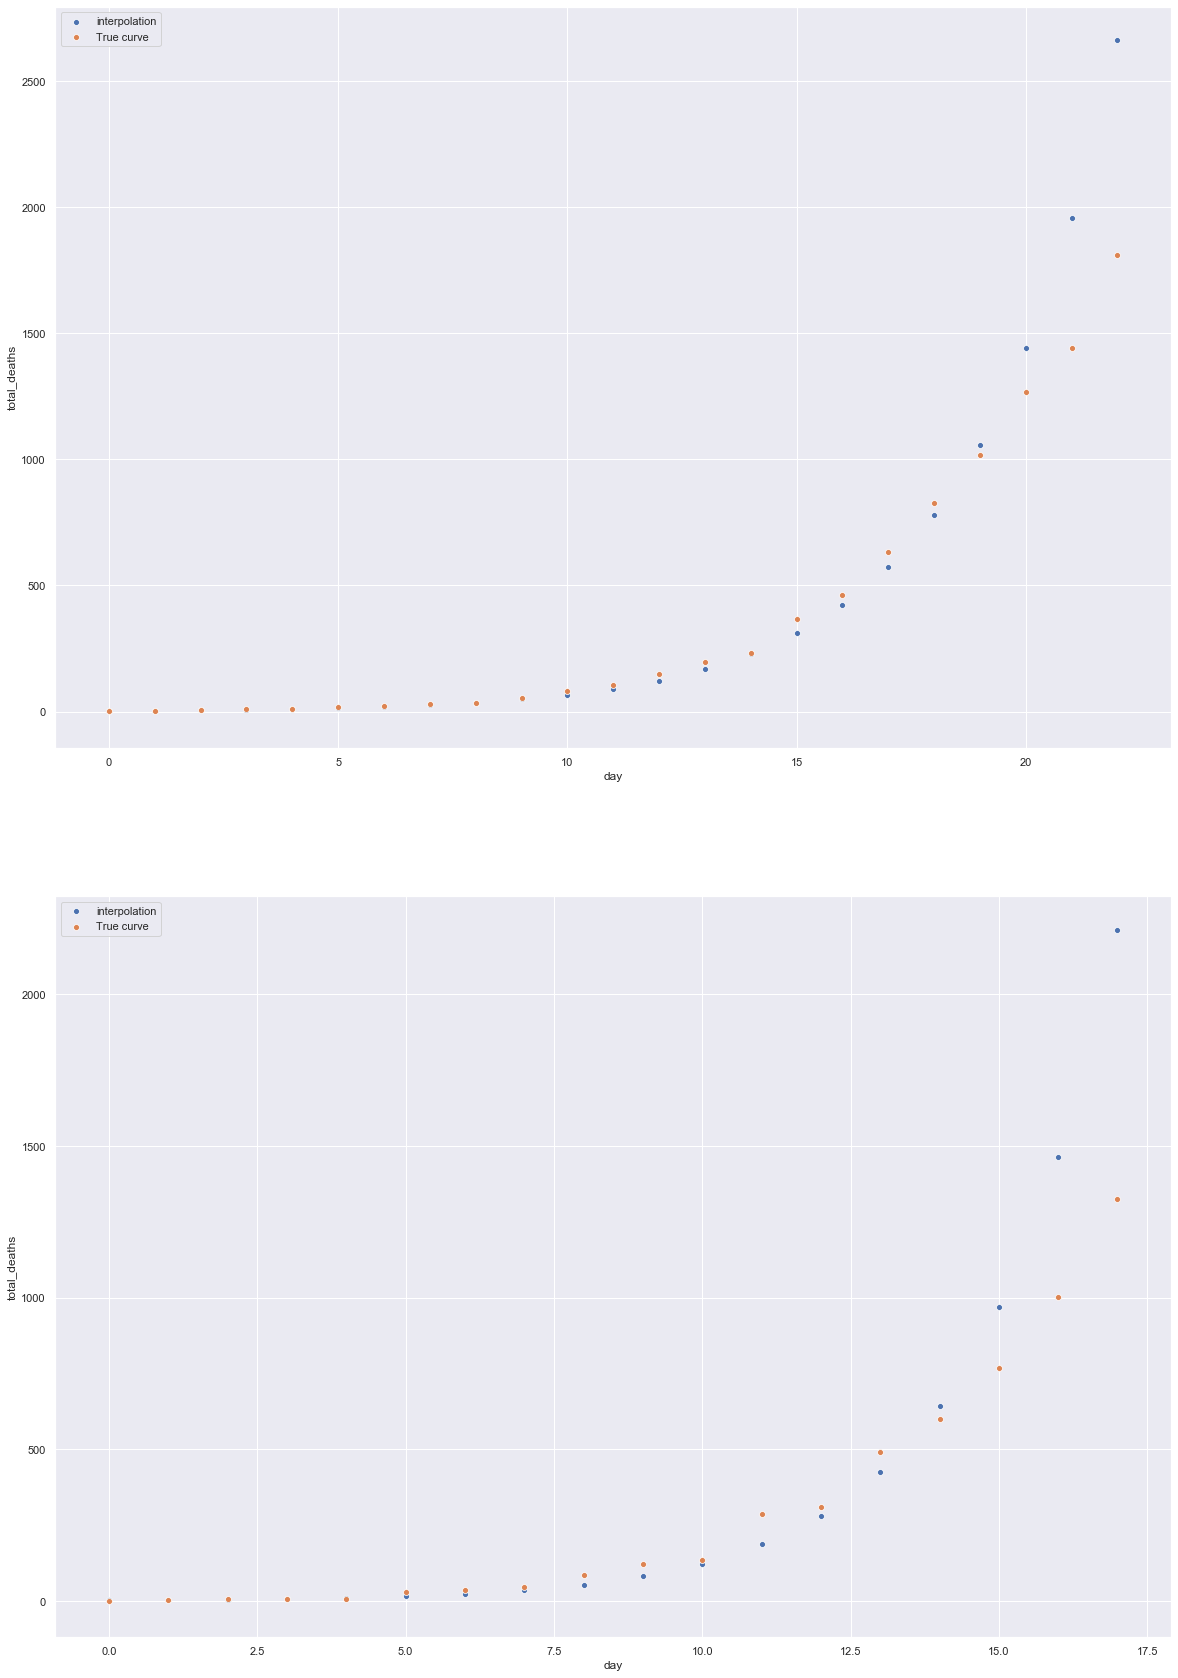

In [38]:
fig,ax=plt.subplots(2,1,figsize=(20,30))
sns.set()

sns.scatterplot(x=I2.day,y=np.exp(WI),ax=ax[0],label='interpolation')
sns.scatterplot(x=I2.day,y=I2["total_deaths"],ax=ax[0],label='True curve')

sns.scatterplot(x=S2.day,y=np.exp(WS),ax=ax[1],label='interpolation')
sns.scatterplot(x=S2.day,y=S2["total_deaths"],ax=ax[1],label='True curve')

Unfortunatly (on a human being caring about others perspective), it fits, it looks like there is more dead than announced

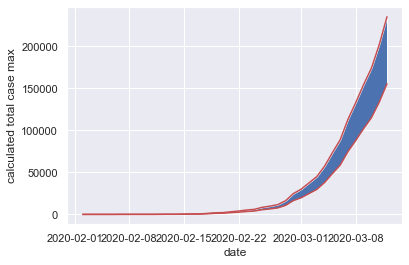

In [49]:
F

,new_cases,new_deaths,total_cases,total_deaths,calculated total case min,calculated total case max
date,,,,,,
2020-02-02,0.0,0.0,6.0,0.0,44.129927,66.766585
2020-02-03,0.0,0.0,6.0,0.0,44.129927,66.766585
2020-02-04,0.0,0.0,6.0,0.0,44.129927,66.766585
2020-02-05,0.0,0.0,6.0,0.0,44.129927,66.766585
2020-02-06,0.0,0.0,6.0,0.0,44.129927,66.766585
2020-02-07,0.0,0.0,6.0,0.0,88.259854,133.533170
2020-02-08,5.0,0.0,11.0,0.0,88.259854,133.533170
2020-02-09,0.0,0.0,11.0,0.0,88.259854,133.533170
2020-02-10,0.0,0.0,11.0,0.0,88.259854,133.533170
